<a href="https://colab.research.google.com/github/prj99/EDA-on-Terrorism/blob/main/EDA_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [115]:
from google.colab import files
uplod=files.upload()

In [116]:
df=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')

<ipython-input-116-3b83f4cd568e>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/globalterrorismdb_0718dist.csv",encoding='latin1')


In [117]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [118]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


<Axes: >

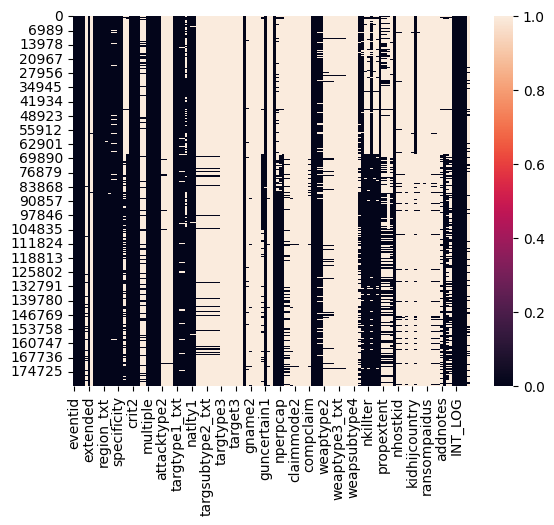

In [120]:
sb.heatmap(df.isnull(),cmap=None)

In [121]:
df=df[['iyear', 'imonth', 'iday', 'approxdate','country', 'country_txt', 'region_txt','attacktype1_txt','target1','targtype1_txt','weaptype1_txt','motive',"gname","nkill","nwound"]]

In [122]:
df.head()

,iyear,imonth,iday,approxdate,country,country_txt,region_txt,attacktype1_txt,target1,targtype1_txt,weaptype1_txt,motive,gname,nkill,nwound
0,1970,7,2,NaN,58,Dominican Republic,Central America & Caribbean,Assassination,Julio Guzman,Private Citizens & Property,Unknown,NaN,MANO-D,1.0,0.0
1,1970,0,0,NaN,130,Mexico,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",Government (Diplomatic),Unknown,NaN,23rd of September Communist League,0.0,0.0
2,1970,1,0,NaN,160,Philippines,Southeast Asia,Assassination,Employee,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0
3,1970,1,0,NaN,78,Greece,Western Europe,Bombing/Explosion,U.S. Embassy,Government (Diplomatic),Explosives,NaN,Unknown,NaN,NaN
4,1970,1,0,NaN,101,Japan,East Asia,Facility/Infrastructure Attack,U.S. Consulate,Government (Diplomatic),Incendiary,NaN,Unknown,NaN,NaN


In [123]:
df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
approxdate         172452
country                 0
country_txt             0
region_txt              0
attacktype1_txt         0
target1               636
targtype1_txt           0
weaptype1_txt           0
motive             131130
gname                   0
nkill               10313
nwound              16311
dtype: int64

In [124]:
df=df.drop(["approxdate"],axis=1)

In [125]:
df.head()

,iyear,imonth,iday,country,country_txt,region_txt,attacktype1_txt,target1,targtype1_txt,weaptype1_txt,motive,gname,nkill,nwound
0,1970,7,2,58,Dominican Republic,Central America & Caribbean,Assassination,Julio Guzman,Private Citizens & Property,Unknown,NaN,MANO-D,1.0,0.0
1,1970,0,0,130,Mexico,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",Government (Diplomatic),Unknown,NaN,23rd of September Communist League,0.0,0.0
2,1970,1,0,160,Philippines,Southeast Asia,Assassination,Employee,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0
3,1970,1,0,78,Greece,Western Europe,Bombing/Explosion,U.S. Embassy,Government (Diplomatic),Explosives,NaN,Unknown,NaN,NaN
4,1970,1,0,101,Japan,East Asia,Facility/Infrastructure Attack,U.S. Consulate,Government (Diplomatic),Incendiary,NaN,Unknown,NaN,NaN


<Axes: >

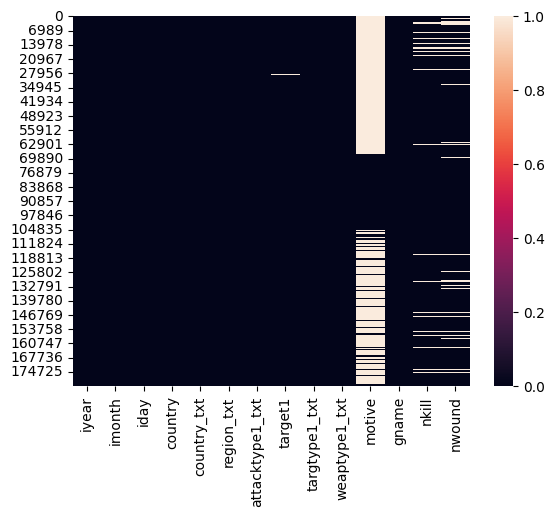

In [126]:
sb.heatmap(df.isnull(),cmap=None)

In [127]:
df.duplicated().sum()

14319

In [128]:
df=df.drop_duplicates()

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167372 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            167372 non-null  int64  
 1   imonth           167372 non-null  int64  
 2   iday             167372 non-null  int64  
 3   country          167372 non-null  int64  
 4   country_txt      167372 non-null  object 
 5   region_txt       167372 non-null  object 
 6   attacktype1_txt  167372 non-null  object 
 7   target1          166837 non-null  object 
 8   targtype1_txt    167372 non-null  object 
 9   weaptype1_txt    167372 non-null  object 
 10  motive           48826 non-null   object 
 11  gname            167372 non-null  object 
 12  nkill            158606 non-null  float64
 13  nwound           153042 non-null  float64
dtypes: float64(2), int64(4), object(8)
memory usage: 19.2+ MB


In [130]:
df.country_txt.value_counts().values

array([22735, 13482, 12070, 11357,  7399,  6694,  4996,  4941,  4054,
        4037,  4021,  3544,  3538,  3193,  2999,  2871,  2745,  2709,
        2414,  2306,  2185,  2170,  2150,  2057,  1966,  1944,  1927,
        1904,  1880,  1682,  1448,  1423,  1394,  1142,  1137,   903,
         767,   715,   695,   671,   671,   647,   559,   553,   520,
         475,   455,   387,   374,   356,   355,   346,   314,   304,
         278,   277,   275,   270,   263,   218,   213,   211,   209,
         202,   201,   198,   191,   190,   181,   180,   158,   153,
         151,   149,   143,   128,   126,   126,   118,   116,   115,
         112,   110,   110,   108,   107,   107,   103,   101,   100,
          95,    89,    88,    85,    81,    79,    77,    74,    72,
          70,    69,    67,    63,    57,    56,    55,    52,    50,
          49,    48,    48,    47,    42,    40,    40,    39,    38,
          35,    34,    34,    32,    32,    31,    30,    29,    29,
          28,    28,

In [131]:
df.country_txt.value_counts().index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'United Kingdom', 'Somalia', 'El Salvador',
       ...
       'New Hebrides', 'South Vietnam', 'North Korea', 'St. Lucia', 'Andorra',
       'International', 'Vatican City', 'Wallis and Futuna',
       'Falkland Islands', 'Antigua and Barbuda'],
      dtype='object', length=205)

# Attack characteristics

In [132]:
#This may include the types of attacks, targets, weapons used, and tactics employed. Such insights can guide counter-terrorism strategies.

In [133]:
print("Most Attack Types:",df['attacktype1_txt'].value_counts().idxmax())
print("Most Used Weapon:",df['weaptype1_txt'].value_counts().idxmax())
print("Most Targets:",df['target1'].value_counts().idxmax())

Most Attack Types: Bombing/Explosion
Most Used Weapon: Explosives
Most Targets: Civilians


In [134]:
at_index=df.attacktype1_txt.value_counts().index
at_val=df.attacktype1_txt.value_counts().values
at_index=df.attacktype1_txt.value_counts().index
at_val=df.attacktype1_txt.value_counts().values
weap_index=df.weaptype1_txt.value_counts().index
weap_val=df.weaptype1_txt.value_counts().values

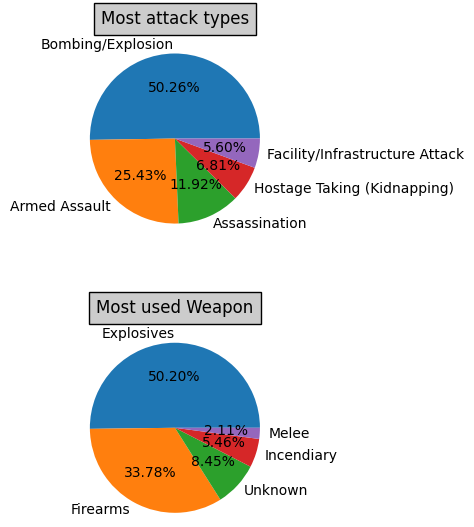

In [135]:

plt.subplot(4,6,1)
plt.pie(at_val[:5],labels=at_index[:5],autopct='%1.2f%%', radius=3)
plt.title("Most attack types",bbox={'facecolor':'0.8', 'pad':5},y=2)
plt.subplot(4,6,19)
plt.pie(weap_val[:5],labels=weap_index[:5],autopct='%1.2f%%', radius=3)
plt.title(label="Most used Weapon",bbox={'facecolor':'0.8', 'pad':5},y=2)
plt.show()

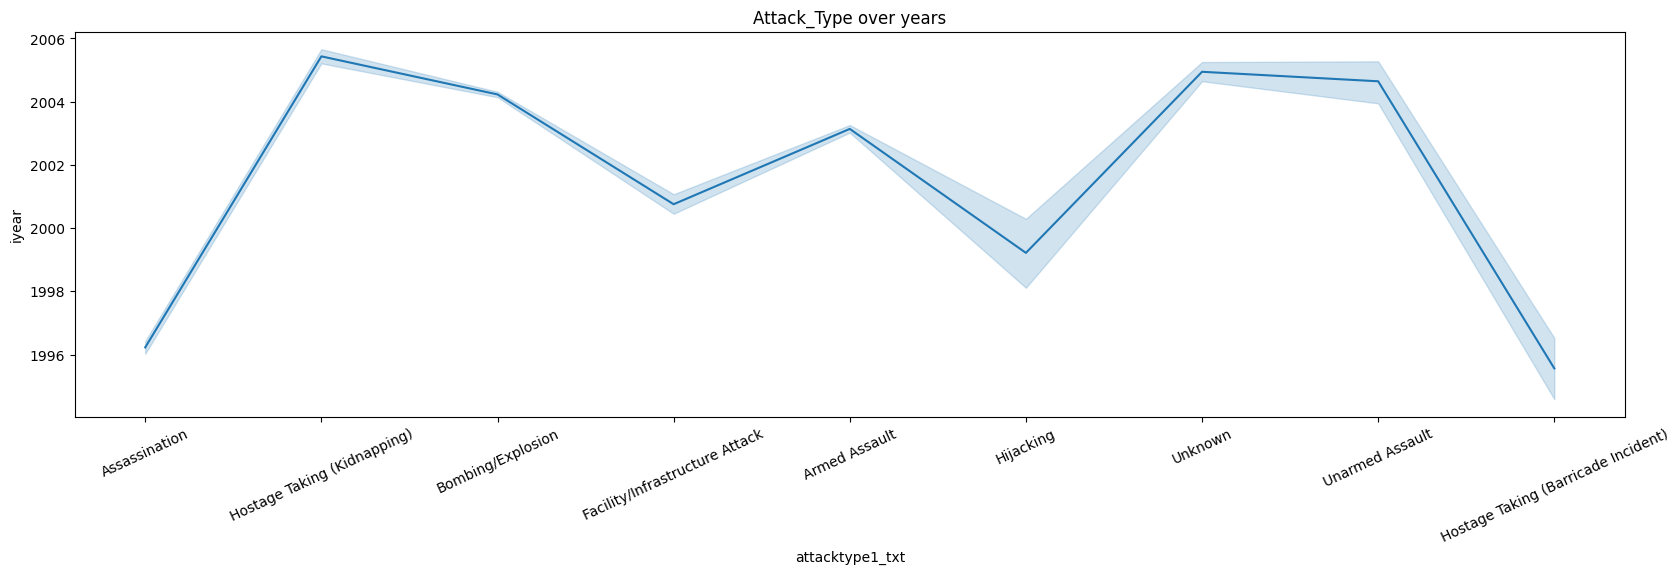

In [136]:

plt.subplots(figsize=(20,5))
sb.lineplot(x='attacktype1_txt',y='iyear',data=df)
plt.xticks(rotation=25)
plt.title("Attack_Type over years")
plt.show()


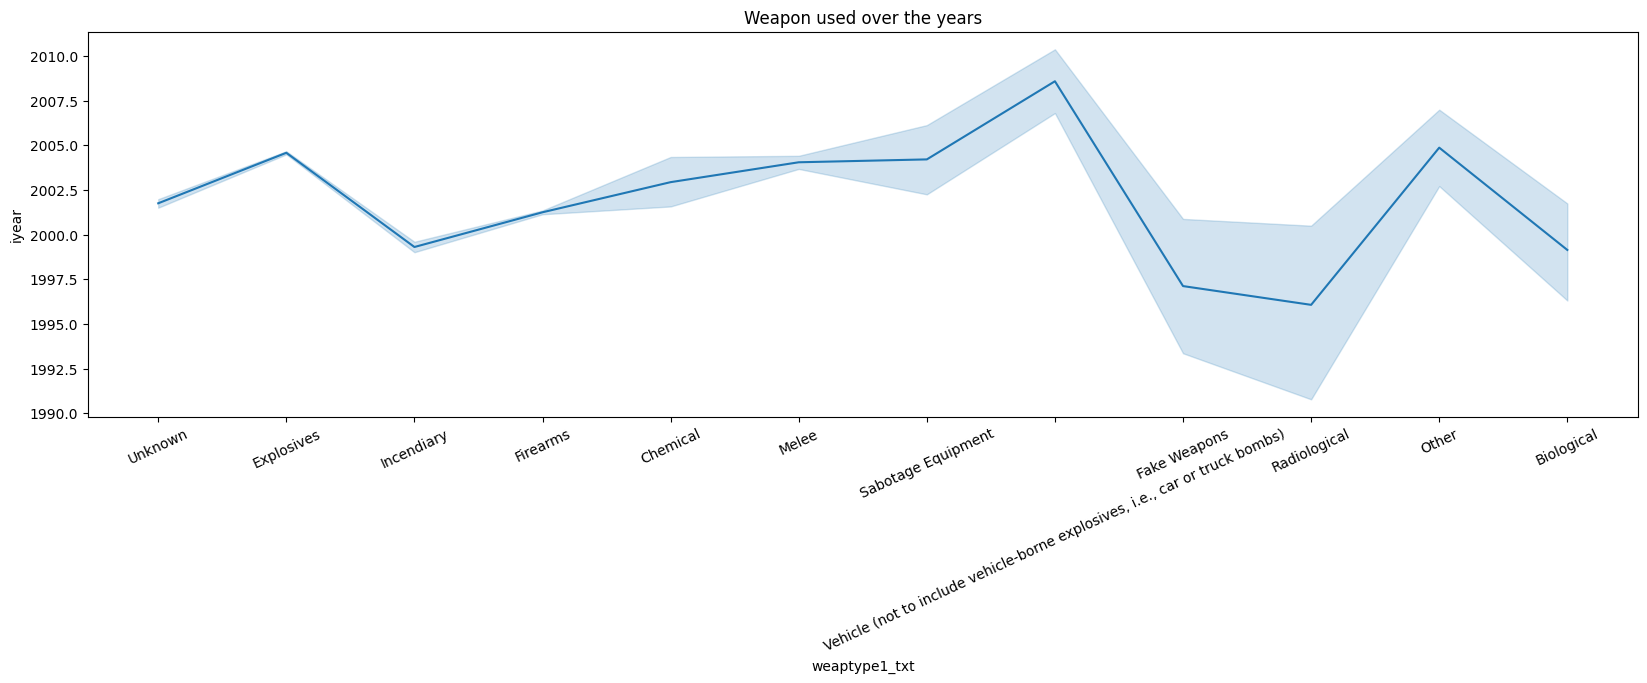

In [137]:
plt.subplots(figsize=(20,5))
sb.lineplot(x='weaptype1_txt',y='iyear',data=df)
plt.xticks(rotation=25)
plt.title("Weapon used over the years")
plt.show()


In [138]:
att_df=df.groupby(['attacktype1_txt','weaptype1_txt','target1']).size().reset_index()

In [139]:
att_df.head()

,attacktype1_txt,weaptype1_txt,target1,0
0,Armed Assault,Chemical,2 Israeli Soldiers,1
1,Armed Assault,Chemical,Meeting of anti-govt groups,1
2,Armed Assault,Explosives,10 Zamzam Aerial Monitoring Checkpoint,1
3,Armed Assault,Explosives,104th Brigade Soldiers,1
4,Armed Assault,Explosives,111th Infantry Brigade Barracks,1


In [140]:
att_df=pd.concat([att_df,df["iyear"]],axis=1)

In [141]:
att_df.head()

,attacktype1_txt,weaptype1_txt,target1,0,iyear
0,Armed Assault,Chemical,2 Israeli Soldiers,1.0,1970.0
1,Armed Assault,Chemical,Meeting of anti-govt groups,1.0,1970.0
2,Armed Assault,Explosives,10 Zamzam Aerial Monitoring Checkpoint,1.0,1970.0
3,Armed Assault,Explosives,104th Brigade Soldiers,1.0,1970.0
4,Armed Assault,Explosives,111th Infantry Brigade Barracks,1.0,1970.0


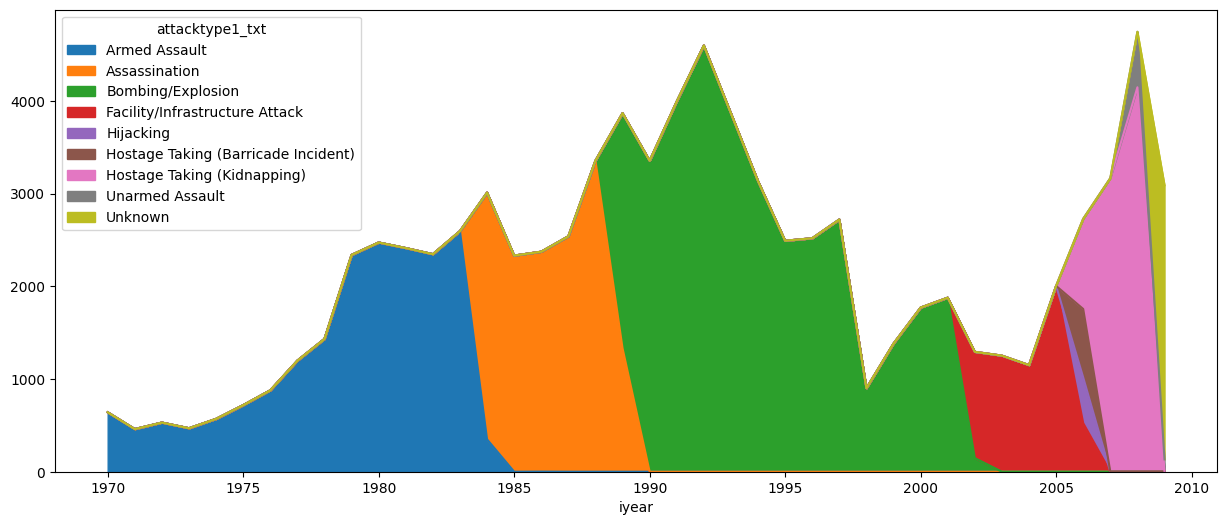

In [142]:

pd.crosstab(att_df.iyear,att_df.attacktype1_txt).plot(kind="area",figsize=(15,6))
plt.show()

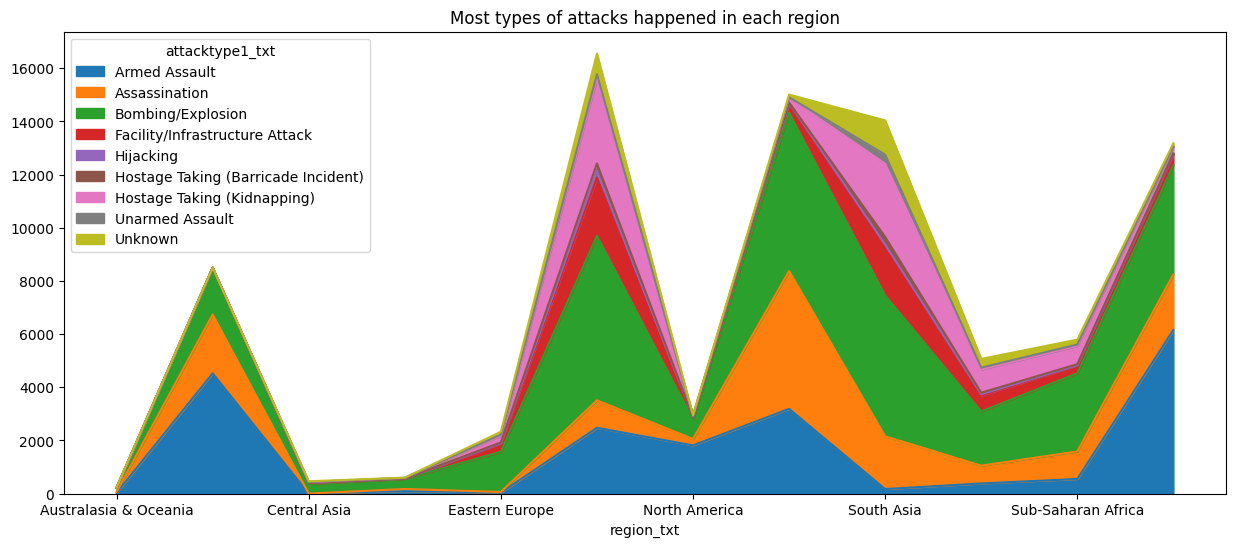

In [143]:
pd.crosstab(df.region_txt,att_df.attacktype1_txt).plot(kind="area",figsize=(15,6))
plt.title("Most types of attacks happened in each region")
plt.show()

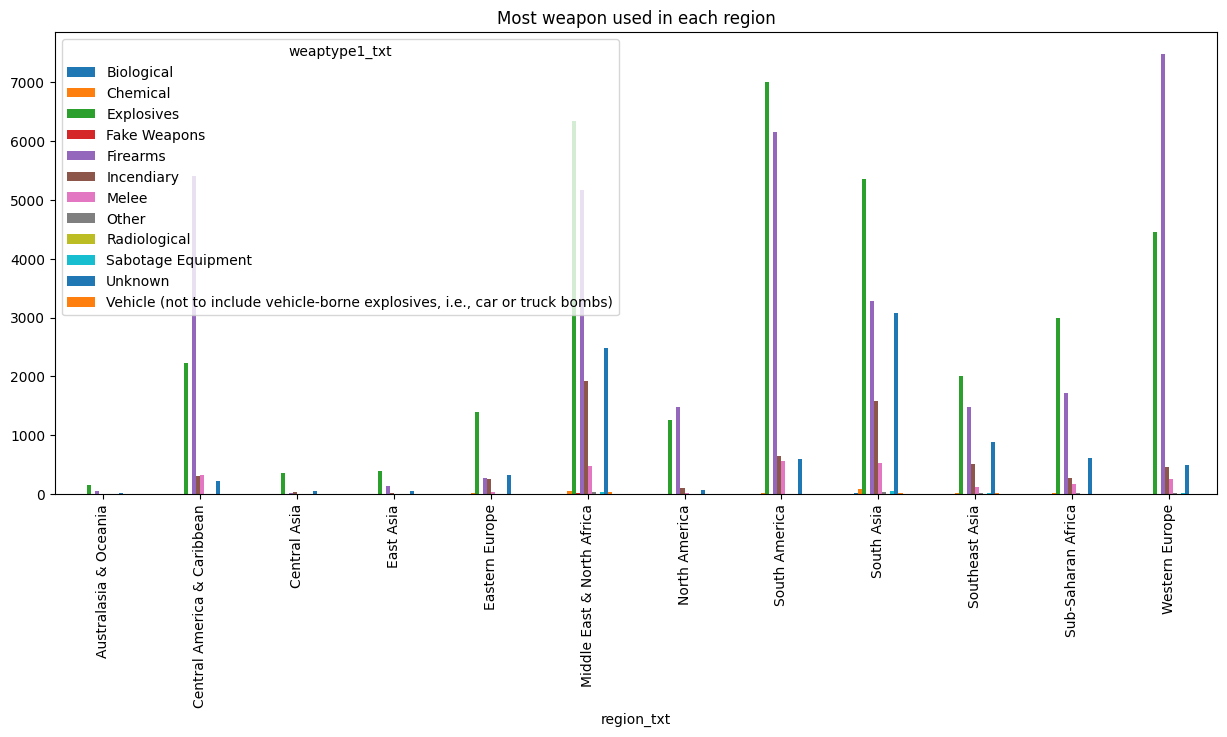

In [144]:
pd.crosstab(df.region_txt,att_df.weaptype1_txt).plot(kind="bar",figsize=(15,6))
plt.title("Most weapon used in each region")
plt.show()

# High risk-regions

In [145]:
"High Risk-Region:",df.region_txt.value_counts().idxmax()

('High Risk-Region:', 'Middle East & North Africa')

In [146]:
high_rr_index=df.region_txt.value_counts().index

In [147]:
high_rr_val=df.region_txt.value_counts().values

Text(0, 0.5, 'Count')

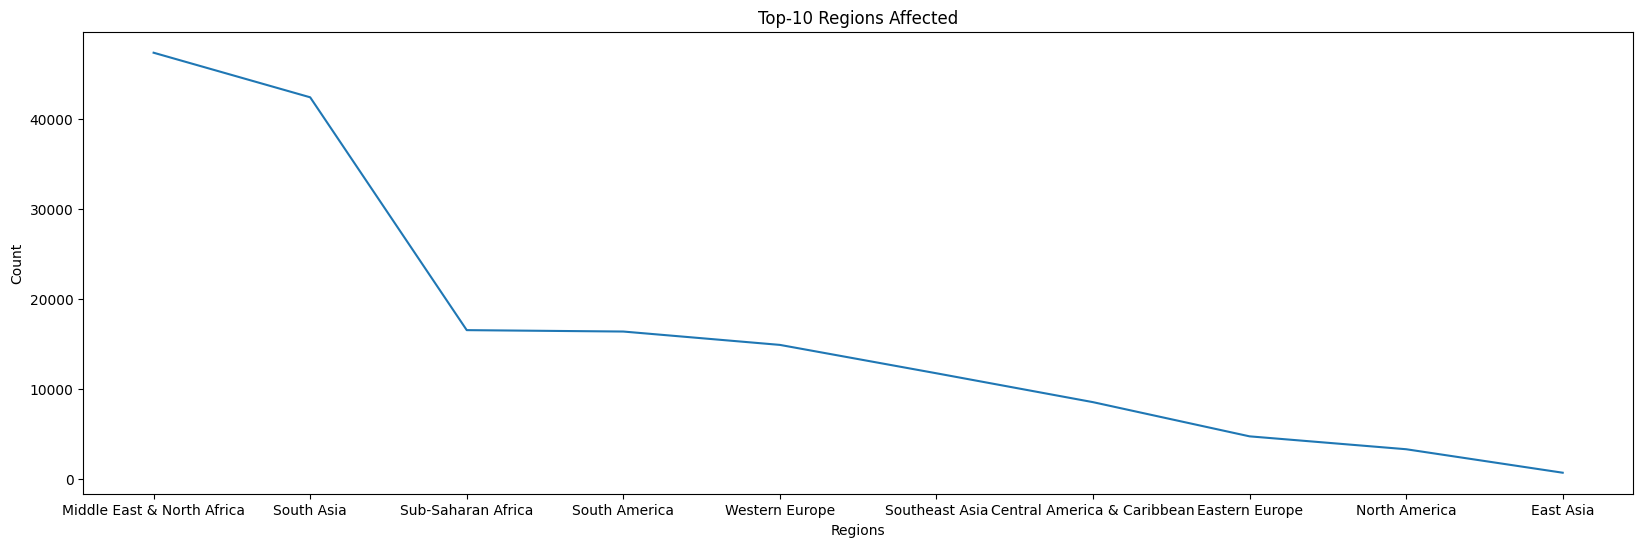

In [148]:
plt.subplots(figsize=(20,6))
plt.plot(high_rr_index[:10],high_rr_val[:10])
plt.title('Top-10 Regions Affected')
plt.xlabel('Regions')
plt.ylabel('Count')

Text(0.5, 1.0, 'Top Regions Affected')

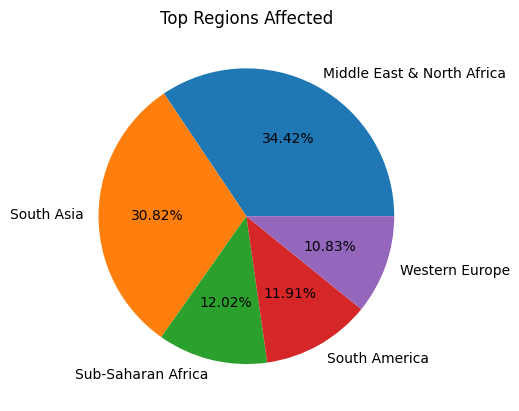

In [149]:
plt.pie(high_rr_val[:5],labels=high_rr_index[:5],autopct='%1.2f%%')
plt.title('Top Regions Affected')

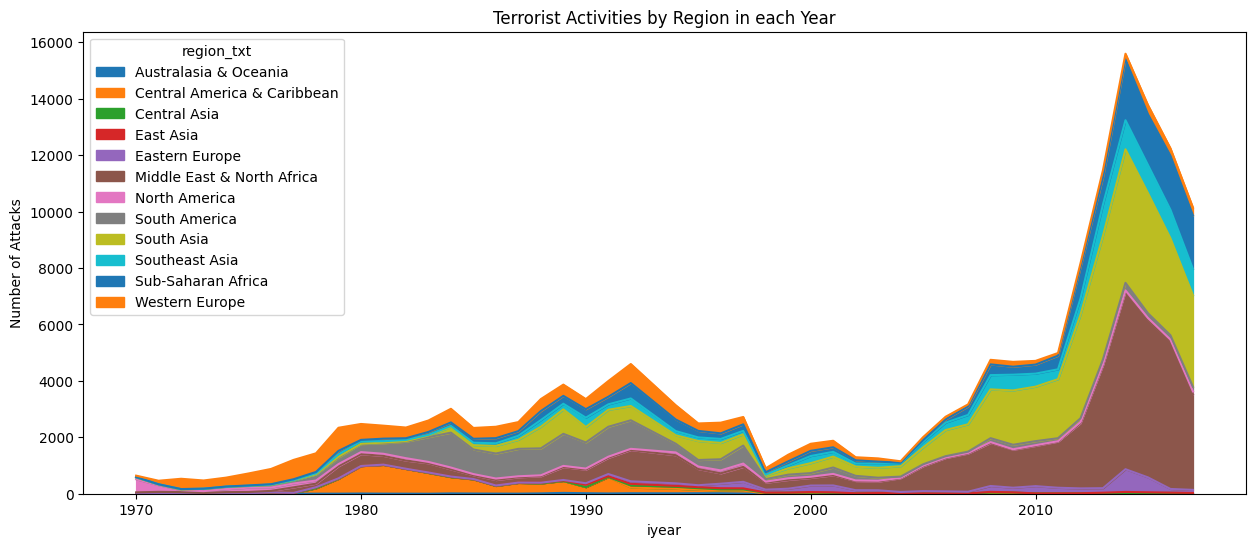

In [150]:
pd.crosstab(df.iyear, df.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

#Uncover trends of terrorist attacks,

In [151]:
kill=df.loc[:,"nkill"].sum()
print("Total number of people killed due to Terrorist Attacks",kill)

Total number of people killed due to Terrorist Attacks 402699.0


In [152]:
grp=df[["gname","region_txt","nkill"]].groupby(["gname","region_txt"],axis=0).sum().sort_values(by="nkill",ascending=False).drop("Unknown").head(10)
grp

<ipython-input-152-b8db807ccb3d>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  grp=df[["gname","region_txt","nkill"]].groupby(["gname","region_txt"],axis=0).sum().sort_values(by="nkill",ascending=False).drop("Unknown").head(10)


,,nkill
gname,region_txt,
Islamic State of Iraq and the Levant (ISIL),Middle East & North Africa,37725.0
Taliban,South Asia,28701.0
Boko Haram,Sub-Saharan Africa,19382.0
Shining Path (SL),South America,11296.0
Liberation Tigers of Tamil Eelam (LTTE),South Asia,10829.0
Al-Shabaab,Sub-Saharan Africa,9225.0
Farabundo Marti National Liberation Front (FMLN),Central America & Caribbean,7940.0
Nicaraguan Democratic Force (FDN),Central America & Caribbean,6651.0
Tehrik-i-Taliban Pakistan (TTP),South Asia,6014.0


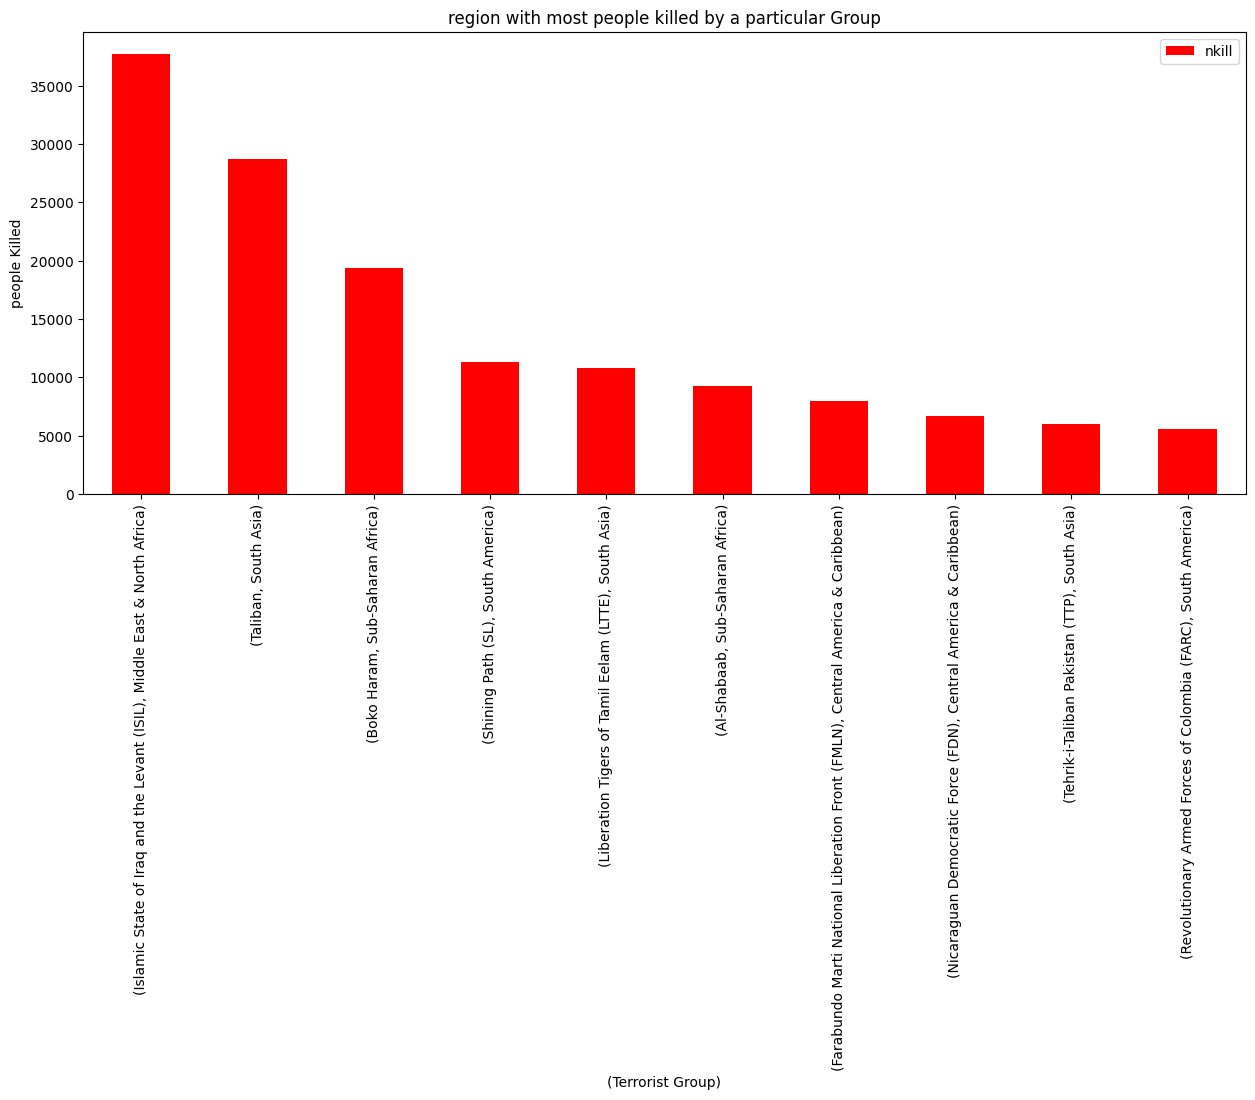

In [153]:
grp.plot(kind="bar",color='red',figsize=(15,6))
plt.title("region with most people killed by a particular Group")
plt.xlabel("(Terrorist Group)")
plt.ylabel("people Killed")
plt.show()

In [154]:

wound=df.loc[:,"nwound"].sum()
print("Total number of people killed due to Terrorist Attacks ",wound)

Total number of people killed due to Terrorist Attacks  516048.0


In [155]:
wrp=df[["gname","region_txt","nwound"]].groupby(["gname","region_txt"],axis=0).sum().sort_values(by="nwound",ascending=False).drop("Unknown").head(10)
wrp

<ipython-input-155-9ae5ca32b2e5>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  wrp=df[["gname","region_txt","nwound"]].groupby(["gname","region_txt"],axis=0).sum().sort_values(by="nwound",ascending=False).drop("Unknown").head(10)


,,nwound
gname,region_txt,
Islamic State of Iraq and the Levant (ISIL),Middle East & North Africa,29071.0
Taliban,South Asia,27527.0
Al-Qaida,North America,16493.0
Liberation Tigers of Tamil Eelam (LTTE),South Asia,10919.0
Tehrik-i-Taliban Pakistan (TTP),South Asia,9524.0
Al-Qaida in Iraq,Middle East & North Africa,9415.0
Boko Haram,Sub-Saharan Africa,9307.0
Al-Shabaab,Sub-Saharan Africa,7572.0
Aum Shinri Kyo,East Asia,6003.0


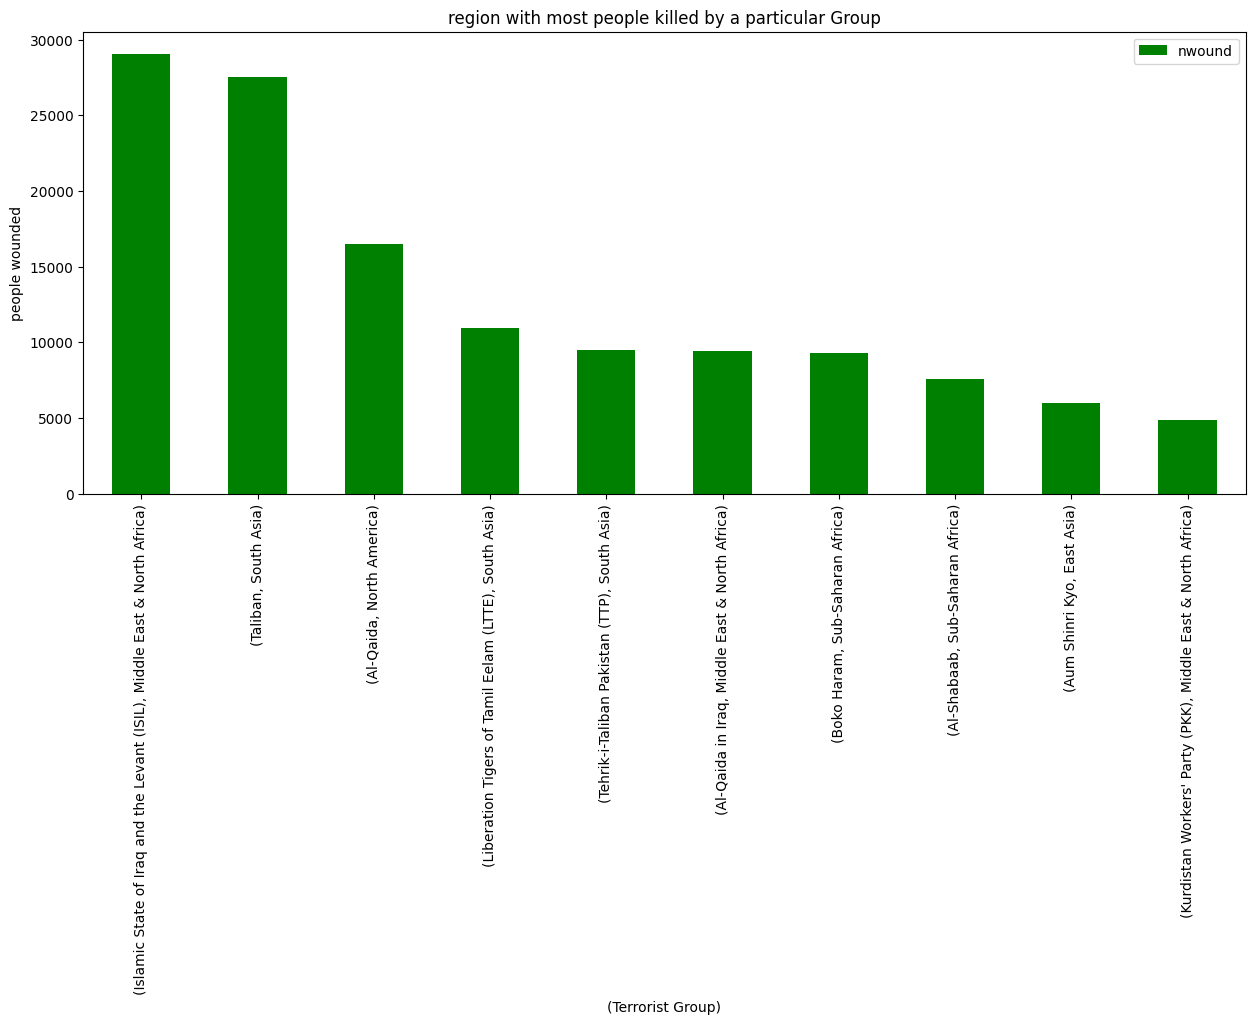

In [156]:
wrp.plot(kind="bar",color='green',figsize=(15,6))
plt.title("region with most people killed by a particular Group")
plt.xlabel("(Terrorist Group)")
plt.ylabel("people wounded")
plt.show()

# Factors that contribute to terrorist activities

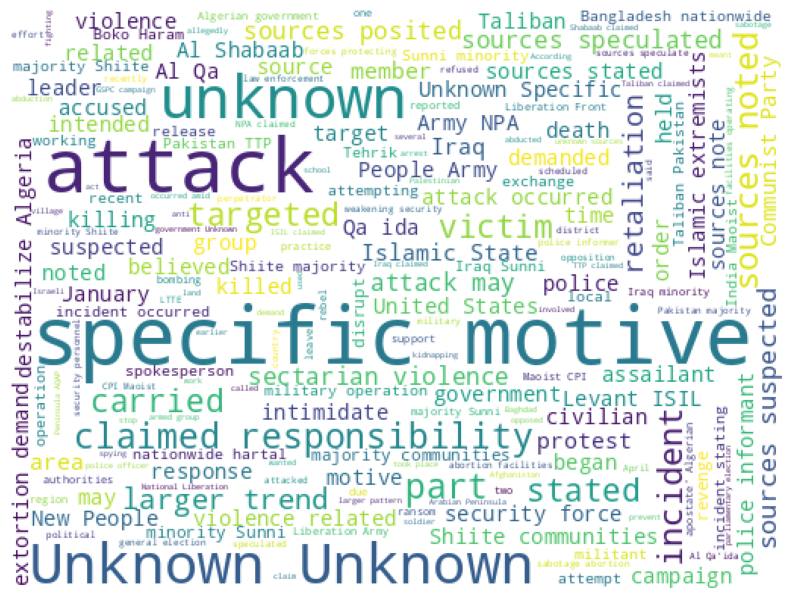

In [169]:
from wordcloud import WordCloud
from scipy import signal
mot = df['motive'].dropna()
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',width = 512,height = 384).generate(' '.join(mot))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [194]:
 df.motive.value_counts(dropna=True)

Unknown                                                                                                                                                                                                                                         14651
The specific motive for the attack is unknown.                                                                                                                                                                                                  14203
The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.                                                277
The specific motive for the attack is unknown..                                                                                                                                                                                                   146
The specific mot